In [1]:
#import library untuk pemrosesan data dan mengaplikasikan ke gambar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#insert data test dan train
data_train = pd.read_csv("salju_train.csv")
data_test = pd.read_csv("salju_test.csv")
#output data train
data_train

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,109091,31/01/2009,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,...,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,Tidak,Ya
109091,109092,03/11/2010,C16,15.7,25.2,0.0,NaN,NaN,SSE,37.0,...,52.0,52.0,1018.4,1016.2,NaN,NaN,23.8,24.4,Tidak,Ya
109092,109093,11/11/2010,C17,7.5,20.4,1.6,NaN,NaN,NW,33.0,...,92.0,51.0,1014.5,1010.6,NaN,NaN,12.6,19.8,Ya,Tidak
109093,109094,16/04/2012,C11,10.8,29.8,0.0,7.8,11.2,E,48.0,...,35.0,18.0,1020.0,1015.8,0.0,1.0,21.7,29.2,Tidak,Tidak


In [47]:
#mengambil 2 kolom dari data sebagai contoh untuk clustering
label = (data_train[["Kelembaban9am", "Kelembaban3pm"]])
label

,Kelembaban9am,Kelembaban3pm
0,78.0,76.0
1,80.0,61.0
2,62.0,42.0
3,25.0,17.0
4,55.0,48.0
...,...,...
109090,74.0,70.0
109091,52.0,52.0
109092,92.0,51.0
109093,35.0,18.0


In [48]:
#Mengisi nilai NaN pada data dengan median/ Preprocessing
label = label.fillna(label.median())
label

,Kelembaban9am,Kelembaban3pm
0,78.0,76.0
1,80.0,61.0
2,62.0,42.0
3,25.0,17.0
4,55.0,48.0
...,...,...
109090,74.0,70.0
109091,52.0,52.0
109092,92.0,51.0
109093,35.0,18.0


In [49]:
#Memisahkan 2 kolom menjadi bentuk matriks
data = label.iloc[:,[0,1]].values
#Output data
data

array([[78., 76.],
       [80., 61.],
       [62., 42.],
       ...,
       [92., 51.],
       [35., 18.],
       [71., 76.]])

In [36]:
#inisialisasi nilai K
k = 5

In [37]:
#Membuat fungsi untuk menghitung jarak dengan Euclidan Distance
def distance(x1, x2):
  return np.sqrt(np.sum((x1-x2) ** 2))

#Membuat fungsi clustering
def clustering(data,k):
  #Menginisialisasi nilai centroid dengan random sebanyak K dari data
  centroid = data[np.random.choice(len(data),size=k,replace=False),:]
  #Melakukan Perulangan dan akan berhenti ketika centroid baru = centroid lama
  while True:
    #Inisialisasi array new centroid
    centroid_new = []
    #Menghitung nilai distance dan mengambil index yang terkecil dari distance kemudian dimasukkan ke array
    label = np.array([np.argmin([distance(c, x) for c in centroid]) for x in data])
    #Melakukan perulangan
    for i in range(k):
      #Menghitung nilai mean dari centroid dan melakukan pengecekan jika j == i dan array dari data dan elemen
      #centroid tidak sama, maka akan dimasukkan kedalam centroid baru untuk dihitung
      c = np.mean([x for j, x in zip(label, data) if j == i and not np.allclose(x, centroid[i])], axis=0)
      centroid_new.append(c)
    #mengubah array menjadi np.array yang lebih kompleks
    centroid_new = np.array(centroid_new)
    #mengecek jika elemen array centroid lama = elemen array centroid baru maka akan return centroid,label dan break looping
    if np.allclose(centroid, centroid_new):
      return centroid, label
    #Update nilai centroid menjadi new centroid dan melakukan looping kembali
    centroid = centroid_new

In [38]:
#Menghitung nilai clustering
cluster,label = clustering(data,k)
#Memasukkan nilai dari data dan label jika data di label == i ke dalam array
clusters = [np.array([obj for obj, lbl in zip(data, label) if lbl == i]) for i in range(k)]

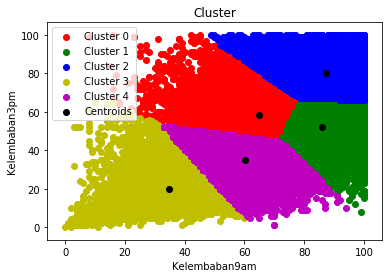

In [39]:
#Inisialsasi warna untuk plot gambar
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'tab:purple']
#Membuat Judul dari plot
plt.title('Cluster')
#Melakukan perulangan untuk plotting clusters dan warna
for i, c in enumerate(clusters):
  plt.scatter(*c.transpose(), color=colors[i], label='Cluster %d' %i)
#plotting centroid
plt.scatter(*cluster.transpose(), color='k', label='Centroids')
#inisialisasi label x
plt.xlabel('Kelembaban9am')
#inisialisasi label y
plt.ylabel('Kelembaban3pm')
plt.legend()
plt.show()

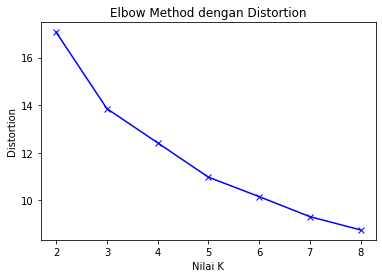

In [54]:
#import library
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
#inisialisasi array
distortions = []
#inisialisasi range K
K = range(2, 9)

#Melakukan perulangan
for i in K:
    # Membangun dan fit dataset
    kmeanModel = KMeans(n_clusters=i).fit(data)
    kmeanModel.fit(data)
    #Memasukkan hasil dari jumlah cdist data,cluster_center ke array
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])
#Plot data
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('Distortion')
plt.title('Elbow Method dengan Distortion')
plt.show()


In [53]:
data_baru = pd.DataFrame(data)
data_baru.columns = ['Kelembaban9am','Kelembaban3pm']
data_baru.to_csv('Data_baru.csv')